In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.options.display.float_format = '{:.2f}'.format

# API + Permission

In [3]:
data = pd.read_csv('Dataset/CIC_MALDROID2020/uniquepermapicombination2020.csv')
data.head()

,android.permission.RECORD_AUDIO,android.permission.MODIFY_AUDIO_SETTINGS,android.permission.WRITE_SETTINGS,android.permission.WRITE_EXTERNAL_STORAGE,android.permission.INTERNET,android.permission.ACCESS_NETWORK_STATE,android.permission.READ_PHONE_STATE,android.permission.GET_TASKS,android.permission.ACCESS_WIFI_STATE,android.permission.CHANGE_WIFI_STATE,...,onBind,Process.start,Context.bindService,Context.bindService.1,ProcessBuilder,Ljava.lang.Class.getResource,defineClass,findClass,Runtime.loadLibrary,class
0,1,1,1,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,1,1,1,1,0,1,1,...,1,0,0,0,0,0,0,0,0,1
2,0,0,0,1,1,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,0,0,0,1,1,1,1,1,1,0,...,1,0,0,0,0,0,0,0,0,1
4,0,0,0,1,1,1,1,1,1,0,...,1,0,0,0,1,0,0,0,0,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2081 entries, 0 to 2080
Columns: 894 entries, android.permission.RECORD_AUDIO to class
dtypes: int64(894)
memory usage: 14.2 MB


In [5]:
data = data.dropna()

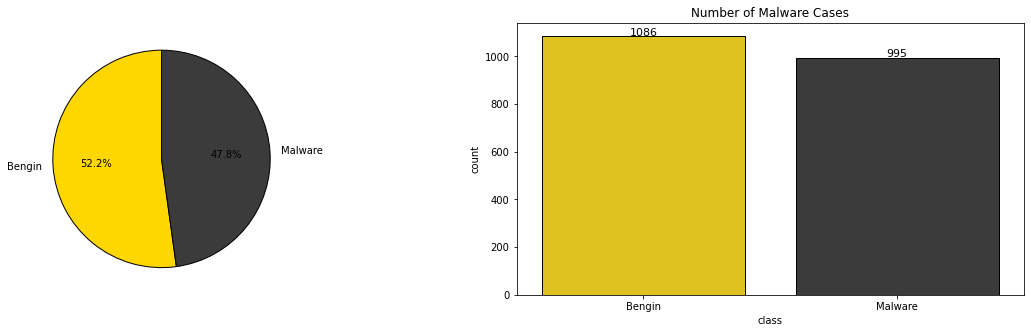

In [6]:
fraud = len(data[data['class'] == 1]) / len(data) * 100
nofraud = len(data[data['class'] == 0]) / len(data) * 100
fraud_percentage = [nofraud,fraud]

colors = ['#FFD700','#3B3B3C']

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (20,5))
plt.subplot(1,2,1)
plt.pie(fraud_percentage,labels = ['Bengin','Malware'],autopct='%1.1f%%',startangle = 90,colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})

plt.subplot(1,2,2)
ax = sns.countplot(x='class',data = data,edgecolor = 'black',palette = colors)
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
ax.set_xticklabels(['Bengin','Malware'])
plt.title('Number of Malware Cases');

In [7]:
X = data.drop('class', axis=1)
y = data['class']

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # keeping 15% for test 

In [9]:
ML_Model = []
accuracy = []
precision = []
recall = []
f1score = []

#function to call for storing the results
def storeResults(model, a,b,c,d):
    ML_Model.append(model)
    accuracy.append(round(a, 3))
    precision.append(round(b, 3))
    recall.append(round(c, 3))
    f1score.append(round(d, 3))

In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Logistic Regression

In [11]:
from sklearn.linear_model import LogisticRegression
#from sklearn.pipeline import Pipeline

# instantiate the model
log = LogisticRegression()

# fit the model 
log.fit(X_train,y_train)
y_pred = log.predict(X_test)

lr_acc_a = accuracy_score(y_test,y_pred)
lr_prec_a = precision_score(y_test,y_pred)
lr_rec_a = recall_score(y_test,y_pred)
lr_f1_a = f1_score(y_test,y_pred)

In [12]:
storeResults('API+Permission : LR',lr_acc_a,lr_prec_a,lr_rec_a,lr_f1_a)

# SVM

In [13]:
# Support Vector Classifier model 
from sklearn.svm import SVC
svc = SVC()

# fit the model 
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)

svc_acc_a = accuracy_score(y_test,y_pred)
svc_prec_a = precision_score(y_test,y_pred)
svc_rec_a = recall_score(y_test,y_pred)
svc_f1_a = f1_score(y_test,y_pred)

In [14]:
storeResults('API+Permission : SVC',svc_acc_a,svc_prec_a,svc_rec_a,svc_f1_a)

# KNN

In [15]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)

# fit the model 
neigh.fit(X_train,y_train)
y_pred = neigh.predict(X_test)

knn_acc_a = accuracy_score(y_test,y_pred)
knn_prec_a = precision_score(y_test,y_pred)
knn_rec_a = recall_score(y_test,y_pred)
knn_f1_a = f1_score(y_test,y_pred)

In [16]:
storeResults('API+Permission : KNN',knn_acc_a,knn_prec_a,knn_rec_a,knn_f1_a)

# Random Forest

In [17]:
# Random Forest Classifier Model
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest = RandomForestClassifier(n_estimators=10)

# fit the model 
forest.fit(X_train,y_train)
y_pred = forest.predict(X_test)

rf_acc_a = accuracy_score(y_test,y_pred)
rf_prec_a = precision_score(y_test,y_pred)
rf_rec_a = recall_score(y_test,y_pred)
rf_f1_a = f1_score(y_test,y_pred)

In [18]:
storeResults('API+Permission : RF',rf_acc_a,rf_prec_a,rf_rec_a,rf_f1_a)

# Decision Tree

In [19]:
# Decision Tree Classifier model 
from sklearn.tree import DecisionTreeClassifier

# instantiate the model 
tree = DecisionTreeClassifier(max_depth=30)

# fit the model 
tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)

dt_acc_a = accuracy_score(y_test,y_pred)
dt_prec_a = precision_score(y_test,y_pred)
dt_rec_a = recall_score(y_test,y_pred)
dt_f1_a = f1_score(y_test,y_pred)

In [20]:
storeResults('API+Permission : DT',dt_acc_a,dt_prec_a,dt_rec_a,dt_f1_a)

# Stacking Classifier

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import StackingClassifier

estimators = [('rf', RandomForestClassifier(n_estimators=10)),('mlp', MLPClassifier(random_state=1, max_iter=300))]

clf = StackingClassifier(estimators=estimators, final_estimator=LGBMClassifier())

# fit the model 
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

stac_acc_a = accuracy_score(y_test,y_pred)
stac_prec_a = precision_score(y_test,y_pred)
stac_rec_a = recall_score(y_test,y_pred)
stac_f1_a = f1_score(y_test,y_pred)

storeResults('API+Permission : Stacking Classifier',stac_acc_a,stac_prec_a,stac_rec_a,stac_f1_a)

In [22]:
stac_acc_a

0.9969951923076923

# Only API

In [23]:
data = pd.read_csv('Dataset/CIC_MALDROID2020/editedapi2020.csv')
data.head()

,transact,onServiceConnected,bindService,attachInterface,ServiceConnection,Ljava.lang.Class.getCanonicalName,android.os.Binder,Ljava.lang.Class.cast,Ljava.lang.Class.getMethods,Ljava.net.URLDecoder,...,onBind,Process.start,Context.bindService,Context.bindService.1,ProcessBuilder,Ljava.lang.Class.getResource,defineClass,findClass,Runtime.loadLibrary,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0,1,1,0,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,1,0,0,1,...,1,0,0,0,1,0,0,0,0,1


In [24]:
data = data.dropna()

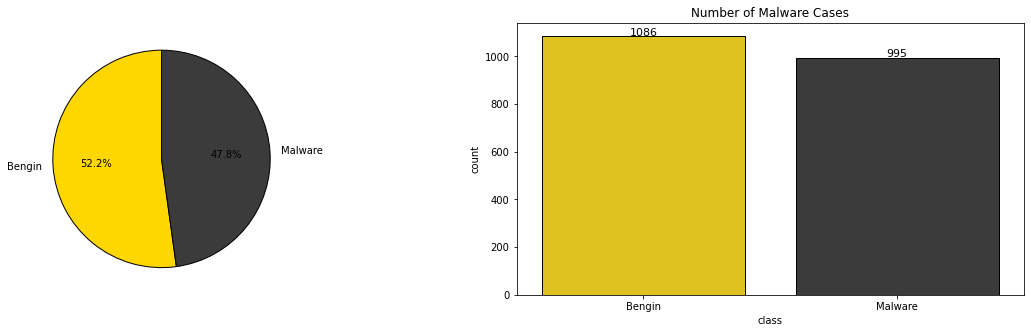

In [25]:
fraud = len(data[data['class'] == 1]) / len(data) * 100
nofraud = len(data[data['class'] == 0]) / len(data) * 100
fraud_percentage = [nofraud,fraud]

colors = ['#FFD700','#3B3B3C']

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (20,5))
plt.subplot(1,2,1)
plt.pie(fraud_percentage,labels = ['Bengin','Malware'],autopct='%1.1f%%',startangle = 90,colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})

plt.subplot(1,2,2)
ax = sns.countplot(x='class',data = data,edgecolor = 'black',palette = colors)
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
ax.set_xticklabels(['Bengin','Malware'])
plt.title('Number of Malware Cases');

In [26]:
X = data.drop('class', axis=1)
y = data['class']

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # keeping 15% for test 

# Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression
#from sklearn.pipeline import Pipeline

# instantiate the model
log1 = LogisticRegression()

# fit the model 
log1.fit(X_train,y_train)
y_pred = log1.predict(X_test)

lr_acc_b = accuracy_score(y_test,y_pred)
lr_prec_b = precision_score(y_test,y_pred)
lr_rec_b = recall_score(y_test,y_pred)
lr_f1_b = f1_score(y_test,y_pred)

In [29]:
storeResults('API : LR',lr_acc_b,lr_prec_b,lr_rec_b,lr_f1_b)

# SVC

In [30]:
# Support Vector Classifier model 
from sklearn.svm import SVC
svc1 = SVC()

# fit the model 
svc1.fit(X_train,y_train)
y_pred = svc1.predict(X_test)

svc_acc_b = accuracy_score(y_test,y_pred)
svc_prec_b = precision_score(y_test,y_pred)
svc_rec_b = recall_score(y_test,y_pred)
svc_f1_b = f1_score(y_test,y_pred)

In [31]:
storeResults('API : SVC',svc_acc_b,svc_prec_b,svc_rec_b,svc_f1_b)

# KNN

In [32]:
from sklearn.neighbors import KNeighborsClassifier
neigh1 = KNeighborsClassifier(n_neighbors=3)

# fit the model 
neigh1.fit(X_train,y_train)
y_pred = neigh1.predict(X_test)

knn_acc_b = accuracy_score(y_test,y_pred)
knn_prec_b = precision_score(y_test,y_pred)
knn_rec_b = recall_score(y_test,y_pred)
knn_f1_b = f1_score(y_test,y_pred)

In [33]:
storeResults('API : KNN',knn_acc_b,knn_prec_b,knn_rec_b,knn_f1_b)

# Random FOrest

In [34]:
# Random Forest Classifier Model
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest1 = RandomForestClassifier(n_estimators=10)

# fit the model 
forest1.fit(X_train,y_train)
y_pred = forest1.predict(X_test)

rf_acc_b = accuracy_score(y_test,y_pred)
rf_prec_b = precision_score(y_test,y_pred)
rf_rec_b = recall_score(y_test,y_pred)
rf_f1_b = f1_score(y_test,y_pred)

In [35]:
storeResults('API : RF',rf_acc_b,rf_prec_b,rf_rec_b,rf_f1_b)

# Decision Tree

In [36]:
# Decision Tree Classifier model 
from sklearn.tree import DecisionTreeClassifier

# instantiate the model 
tree1 = DecisionTreeClassifier(max_depth=30)

# fit the model 
tree1.fit(X_train, y_train)

y_pred = tree1.predict(X_test)

dt_acc_b = accuracy_score(y_test,y_pred)
dt_prec_b = precision_score(y_test,y_pred)
dt_rec_b = recall_score(y_test,y_pred)
dt_f1_b = f1_score(y_test,y_pred)

In [37]:
storeResults('API : DT',dt_acc_b,dt_prec_b,dt_rec_b,dt_f1_b)

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import StackingClassifier

estimators = [('rf', RandomForestClassifier(n_estimators=10)),('mlp', MLPClassifier(random_state=1, max_iter=300))]

clf1 = StackingClassifier(estimators=estimators, final_estimator=LGBMClassifier())

# fit the model 
clf1.fit(X_train, y_train)

y_pred = clf1.predict(X_test)

stac_acc_a = accuracy_score(y_test,y_pred)
stac_prec_a = precision_score(y_test,y_pred)
stac_rec_a = recall_score(y_test,y_pred)
stac_f1_a = f1_score(y_test,y_pred)

storeResults('API : Stacking Classifier',stac_acc_a,stac_prec_a,stac_rec_a,stac_f1_a)

# Only Permission

In [39]:
data = pd.read_csv('Dataset/CIC_MALDROID2020/CIC2020permissionsfromsite.csv')
data.head()

,android.permission.RECORD_AUDIO,android.permission.MODIFY_AUDIO_SETTINGS,android.permission.WRITE_SETTINGS,android.permission.WRITE_EXTERNAL_STORAGE,android.permission.INTERNET,android.permission.ACCESS_NETWORK_STATE,android.permission.READ_PHONE_STATE,android.permission.GET_TASKS,android.permission.ACCESS_WIFI_STATE,android.permission.CHANGE_WIFI_STATE,...,wsj.reader_sp.permission.UA_DATA,sp.permission.C2D_MESSAGE,wsj.reader_sp.permission.C2D_MESSAGE,sp.permission.RECEIVE_ADM_MESSAGE,wsj.reader_sp.permission.RECEIVE_ADM_MESSAGE,pert.permission.C2D_MESSAGE,xcxin.filexpert.permission.C2D_MESSAGE,k.energy.permission.C2D_MESSAGE,you.in.spark.energy.permission.C2D_MESSAGE,class
0,1,1,1,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,1,1,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,1,1,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1


In [40]:
data = data.dropna()

In [41]:
X = data.drop('class', axis=1)
y = data['class']

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # keeping 15% for test 

# Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression
#from sklearn.pipeline import Pipeline

# instantiate the model
log2 = LogisticRegression()

# fit the model 
log2.fit(X_train,y_train)
y_pred = log2.predict(X_test)

lr_acc_c = accuracy_score(y_test,y_pred)
lr_prec_c = precision_score(y_test,y_pred)
lr_rec_c = recall_score(y_test,y_pred)
lr_f1_c = f1_score(y_test,y_pred)

In [44]:
storeResults('Premission : LR',lr_acc_c,lr_prec_c,lr_rec_c,lr_f1_c)

# SVC

In [45]:
# Support Vector Classifier model 
from sklearn.svm import SVC
svc2 = SVC()

# fit the model 
svc2.fit(X_train,y_train)
y_pred = svc2.predict(X_test)

svc_acc_c = accuracy_score(y_test,y_pred)
svc_prec_c = precision_score(y_test,y_pred)
svc_rec_c = recall_score(y_test,y_pred)
svc_f1_c = f1_score(y_test,y_pred)

In [46]:
storeResults('Premission : SVC',svc_acc_c,svc_prec_c,svc_rec_c,svc_f1_c)

# KNN

In [47]:
from sklearn.neighbors import KNeighborsClassifier
neigh2 = KNeighborsClassifier(n_neighbors=3)

# fit the model 
neigh2.fit(X_train,y_train)
y_pred = neigh2.predict(X_test)

knn_acc_c = accuracy_score(y_test,y_pred)
knn_prec_c = precision_score(y_test,y_pred)
knn_rec_c = recall_score(y_test,y_pred)
knn_f1_c = f1_score(y_test,y_pred)

In [48]:
storeResults('Premission : KNN',knn_acc_c,knn_prec_c,knn_rec_c,knn_f1_c)

# Random FOrest

In [49]:
# Random Forest Classifier Model
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest2 = RandomForestClassifier(n_estimators=10)

# fit the model 
forest2.fit(X_train,y_train)
y_pred = forest2.predict(X_test)

rf_acc_c = accuracy_score(y_test,y_pred)
rf_prec_c = precision_score(y_test,y_pred)
rf_rec_c = recall_score(y_test,y_pred)
rf_f1_c = f1_score(y_test,y_pred)

In [50]:
storeResults('Premission : RF',rf_acc_c,rf_prec_c,rf_rec_c,rf_f1_c)

# Decision Tree

In [51]:
# Decision Tree Classifier model 
from sklearn.tree import DecisionTreeClassifier

# instantiate the model 
tree2 = DecisionTreeClassifier(max_depth=30)

# fit the model 
tree2.fit(X_train, y_train)

y_pred = tree2.predict(X_test)

dt_acc_c = accuracy_score(y_test,y_pred)
dt_prec_c = precision_score(y_test,y_pred)
dt_rec_c = recall_score(y_test,y_pred)
dt_f1_c = f1_score(y_test,y_pred)

In [52]:
storeResults('Premission : DT',dt_acc_c,dt_prec_c,dt_rec_c,dt_f1_c)

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import StackingClassifier

estimators = [('rf', RandomForestClassifier(n_estimators=10)),('mlp', MLPClassifier(random_state=1, max_iter=300))]

clf2 = StackingClassifier(estimators=estimators, final_estimator=LGBMClassifier())

# fit the model 
y_pred = clf2.predict(X_test)

stac_acc_a = accuracy_score(y_test,y_pred)
stac_prec_a = precision_score(y_test,y_pred)
stac_rec_a = recall_score(y_test,y_pred)
stac_f1_a = f1_score(y_test,y_pred)

storeResults('Premission : Stacking Classifier',stac_acc_a,stac_prec_a,stac_rec_a,stac_f1_a)

# Comparison

In [54]:
#creating dataframe
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'Accuracy' : accuracy,
                       'Precision': precision, 
                       'f1_score' : f1score,
                        'Recall'   : recall,
                        
                      })

In [55]:
result

,ML Model,Accuracy,Precision,f1_score,Recall
0,API+Permission : LR,0.99,0.98,0.98,0.99
1,API+Permission : SVC,0.99,0.98,0.99,1.00
2,API+Permission : KNN,0.97,0.94,0.97,0.99
3,API+Permission : RF,0.97,0.97,0.97,0.97
4,API+Permission : DT,0.95,0.97,0.95,0.94
5,API+Permission : Stacking Classifier,1.00,1.00,1.00,1.00
6,API : LR,0.95,0.94,0.95,0.97
7,API : SVC,0.96,0.94,0.96,0.97
8,API : KNN,0.94,0.93,0.94,0.95
9,API : RF,0.94,0.94,0.94,0.94


# Graph

In [56]:
classifier = ML_Model
y_pos = np.arange(len(classifier))

# Accuracy

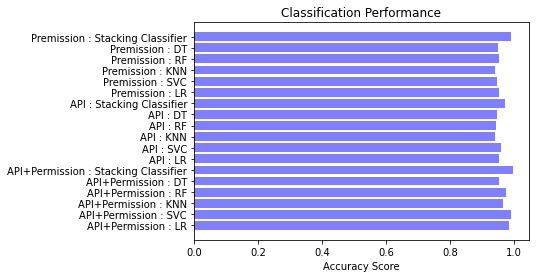

In [57]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, accuracy, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Accuracy Score')
plt2.title('Classification Performance')
plt2.show()

# Precision

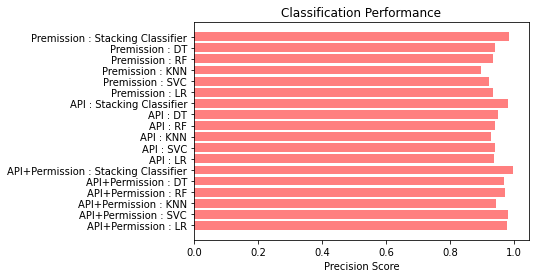

In [58]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, precision, align='center', alpha=0.5,color='red')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Precision Score')
plt2.title('Classification Performance')
plt2.show()

# Recall

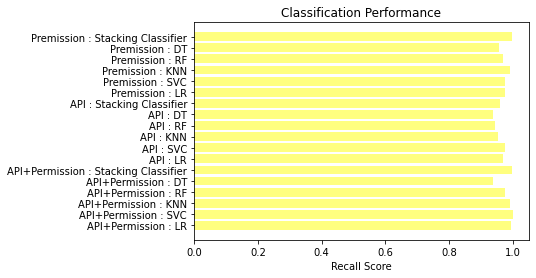

In [59]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, recall, align='center', alpha=0.5,color='yellow')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Recall Score')
plt2.title('Classification Performance')
plt2.show()

# F1 Score

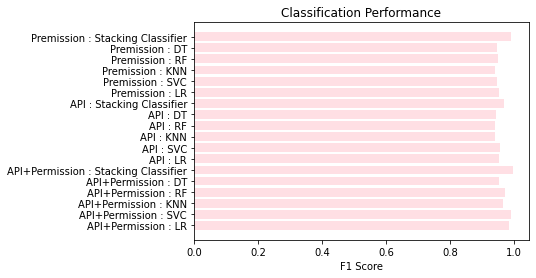

In [60]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, f1score, align='center', alpha=0.5,color='pink')
plt2.yticks(y_pos, classifier)
plt2.xlabel('F1 Score')
plt2.title('Classification Performance')
plt2.show()